In [136]:
import matplotlib.pyplot as plt
import numpy as np
def my_plot_style():
    params = {'legend.fontsize': 15,
    'axes.labelsize': 15,
    'axes.titlesize':15,
    'xtick.labelsize':20,
    'ytick.labelsize':20,
    'xtick.major.size':5,
    'xtick.minor.size':2.5,
    'ytick.major.size':5,
    'ytick.minor.size':2.5,
    'figure.facecolor':'w',
    #'lines.linewidth' : 1.5,
    'xtick.major.width':2.5,
    'ytick.major.width':2.5,
    'xtick.minor.width':2.5,
    'ytick.minor.width':2.5,
    'axes.linewidth':1.5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'ytick.labelleft':True,
    'text.usetex' : False,
    'font.family': 'sans-serif'}
    plt.rcParams.update(params)
my_plot_style()

In [53]:
class plot_obj:
    def __init__(self,name,x,y):
        self.name = name
        self.x    = x
        self.y    = y 
        self.frac = None

In [34]:
file_name = "./data.txt"
data = []
for line in open(file_name,'r').readlines():
    data.append(line.split('\t'))
data = np.array(data)
print(data)
print(data[:,1])

[['20mntio2' '' '' ... 'MnO2' '' '\n']
 ['x' 'y' '' ... 'x' 'y' '\n']
 ['10' '2973.4482' '' ... '37.31524' '61.22' '1224.4\n']
 ...
 ['89.98' '487.2554' '' ... '' '' '\n']
 ['89.99' '527.5008' '' ... '' '' '\n']
 ['90' '554.2802' '' ... '' '' '']]
['' 'y' '2973.4482' ... '487.2554' '527.5008' '554.2802']


In [54]:
plot_arr = []
idx_arr = [0,3,6,10,14]
for i in range(5):
    idx = idx_arr[i]
    x, y = data[2:,idx],data[2:,idx+1]
    x, y = x[x!=''], y[x!='']
    plot = plot_obj(data[0,idx],x,y)
    plot_arr.append(plot)

In [74]:
def spectra(xdata,ydata):
    base = min(ydata)
    xmin, xmax = 10, 90
    xarr, yarr = [10], [base]
    for i in range(len(xdata)):
        for k in range(3): xarr.append(xdata[i])
        yarr.append(base)
        yarr.append(ydata[i])
        yarr.append(base)
    xarr.append(90)
    yarr.append(base)
    return xarr, yarr

Text(0.5, 1.0, 'TiO$_2$(P25)')

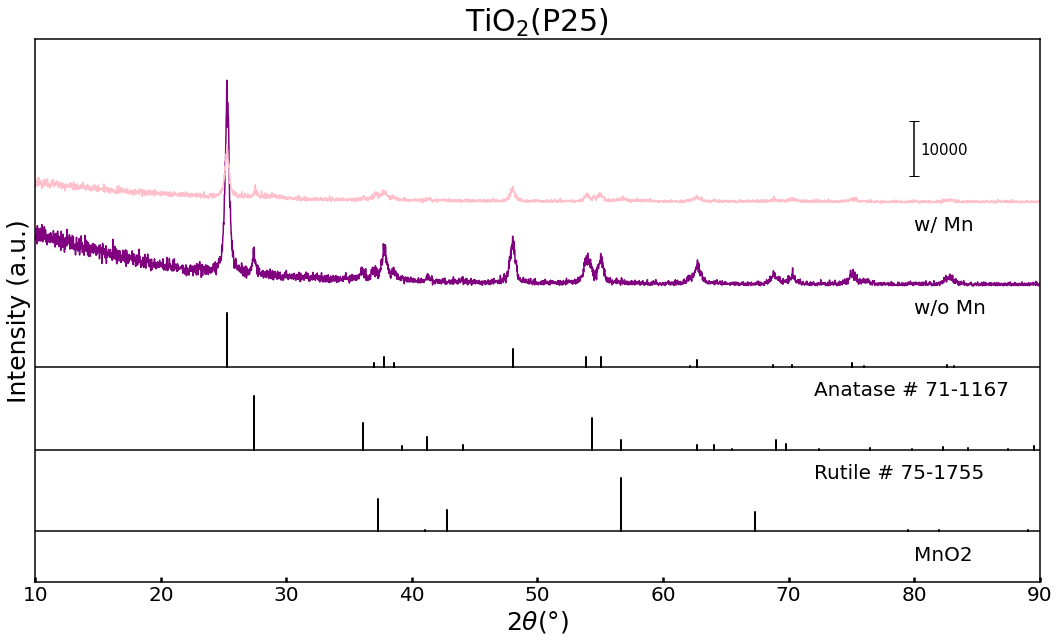

In [144]:
plot_arr = np.array(plot_arr)
color = ['black','black','black','purple','pink']
fig, ax = plt.subplots(figsize=(18,10))
for idx,plot in enumerate(plot_arr[::-1]):
    xdata, ydata = plot.x.astype('float'), plot.y.astype('float')
    if( idx<3 ):
        ydata = ydata/np.max(ydata)
        xdata, ydata = spectra(xdata, ydata)
    else:
        ydata /= 10000
    if( idx==3 ): ydata = ydata*2.5
    ax.plot(xdata, np.array(ydata)+1.5*idx,c=color[idx])

ax.errorbar(80,7,yerr=1/2,capsize=5,color='black')
ax.text(80.5,6.9,'10000',fontsize=15)
ax.set_xlim([10,90])
ax.set_ylim([-0.9,9])
ax.text(80,5.5,'w/ Mn',fontsize=20)
ax.text(80,4,'w/o Mn',fontsize=20)
ax.text(72,2.5,'Anatase # 71-1167',fontsize=20)
ax.text(72,1,'Rutile # 75-1755',fontsize=20)
ax.text(80,-0.5,'MnO2',fontsize=20)
ax.set_yticks([])
ax.set_ylabel('Intensity (a.u.)',fontsize=25)
ax.set_xlabel(r'$2\theta(\degree)$',fontsize=25)
ax.set_title('TiO$_2$(P25)',fontsize=30)X 